<a href="https://colab.research.google.com/github/ziadel-kent/IMGtask/blob/main/IMGproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Step 1: Imports and Upload
import cv2
import numpy as np
import os
from google.colab import files
from matplotlib import pyplot as plt

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded file name

SUPPORTED_FORMATS = ['.jpg', '.png', '.tif']

# 🧠 Step 2: Processing Functions
def adjust_brightness_contrast(image, brightness=0, contrast=0):
    beta = brightness
    alpha = 1.0 + (contrast / 100.0)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

def reduce_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def extract_histogram_features(image):
    chans = cv2.split(image)
    features = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.extend(hist)
    return np.array(features)

# ⚙️ Step 3: Main Processing Pipeline
def process_image(image_path):
    ext = os.path.splitext(image_path)[-1].lower()
    if ext not in SUPPORTED_FORMATS:
        raise ValueError(f"Unsupported file format: {ext}")

    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"File not found: {image_path}")

    filename = os.path.splitext(os.path.basename(image_path))[0]
    os.makedirs("output", exist_ok=True)

    # 1. Brightness/Contrast
    img_bright = adjust_brightness_contrast(image, brightness=30, contrast=40)
    cv2.imwrite(f"output/{filename}_brightness_contrast.jpg", img_bright)

    # 2. Gaussian Blur
    img_blur = apply_gaussian_blur(img_bright)
    cv2.imwrite(f"output/{filename}_blur.jpg", img_blur)

    # 3. Noise Reduction
    img_denoised = reduce_noise(img_blur)
    cv2.imwrite(f"output/{filename}_denoised.jpg", img_denoised)

    # 4. Edge Detection
    gray = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2GRAY)
    img_edges = detect_edges(gray)
    cv2.imwrite(f"output/{filename}_edges.jpg", img_edges)

    # 5. Feature Extraction
    features = extract_histogram_features(img_denoised)
    np.save(f"output/{filename}_features.npy", features)

    print("✅ Processing completed! Outputs saved to /output")

    return filename  # Return for later use

# Run the processing
filename = process_image(image_path)


Saving aero3.jpg to aero3 (2).jpg
✅ Processing completed! Outputs saved to /output


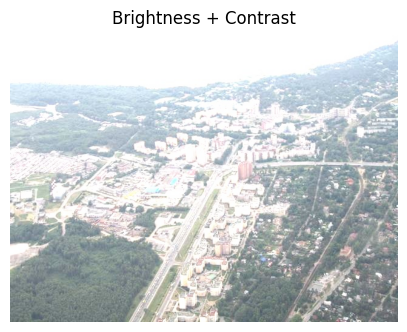

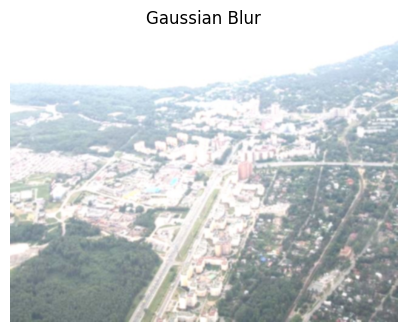

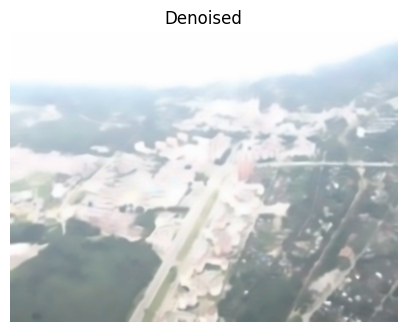

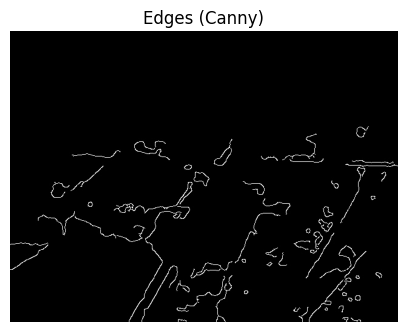

In [ ]:
# 📷 Display function
def show_image(title, img_path, is_gray=False):
    img = cv2.imread(img_path, 0 if is_gray else 1)
    if not is_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray' if is_gray else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 🖼 Show results
show_image("Brightness + Contrast", f"output/{filename}_brightness_contrast.jpg")
show_image("Gaussian Blur", f"output/{filename}_blur.jpg")
show_image("Denoised", f"output/{filename}_denoised.jpg")
show_image("Edges (Canny)", f"output/{filename}_edges.jpg", is_gray=True)


Saving lena.jpg to lena (1).jpg


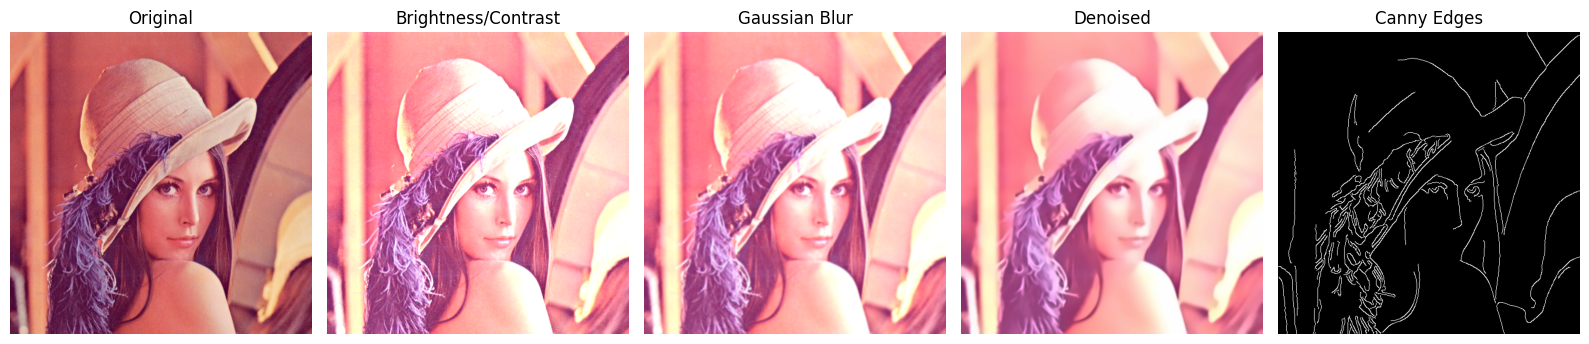

✅ All steps completed. Feature vector saved as:
output/lena (1)_features.npy


In [ ]:
#  Step 1: Imports
import cv2
import numpy as np
import os
from google.colab import files
from matplotlib import pyplot as plt

#  Step 2: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

#  Step 3: Functions for Processing
def adjust_brightness_contrast(image, brightness=30, contrast=40):
    alpha = 1.0 + (contrast / 100.0)
    beta = brightness
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def reduce_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

def extract_histogram_features(image):
    chans = cv2.split(image)
    features = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.extend(hist)
    return np.array(features)

def display_images(images, titles, cmap_flags):
    plt.figure(figsize=(16, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        if cmap_flags[i]:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#  Step 4: Processing Pipeline
# Load image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("Image not loaded.")

filename = os.path.splitext(os.path.basename(image_path))[0]
os.makedirs("output", exist_ok=True)

# Apply operations step by step
img_bc = adjust_brightness_contrast(image)
img_blur = apply_gaussian_blur(img_bc)
img_denoised = reduce_noise(img_blur)
img_gray = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2GRAY)
img_edges = detect_edges(img_gray)

# Save processed images
cv2.imwrite(f"output/{filename}_brightness_contrast.jpg", img_bc)
cv2.imwrite(f"output/{filename}_blur.jpg", img_blur)
cv2.imwrite(f"output/{filename}_denoised.jpg", img_denoised)
cv2.imwrite(f"output/{filename}_edges.jpg", img_edges)

# Extract and save features
features = extract_histogram_features(img_denoised)
np.save(f"output/{filename}_features.npy", features)

#  Step 5: Display results
display_images(
    [image, img_bc, img_blur, img_denoised, img_edges],
    ["Original", "Brightness/Contrast", "Gaussian Blur", "Denoised", "Canny Edges"],
    [False, False, False, False, True]
)

print(" All steps completed. Feature vector saved as:")
print(f"output/{filename}_features.npy")
